Tarea 2 Camilo Silva

##Cosas iniciales

In [1]:
import numpy as np
import pandas as pd

In [2]:
class punto:
    def __init__(self, x1, y1):
        self.x = x1
        self.y = y1
    def __str__(self):
        return ('('+str(self.x)+','+str(self.y)+')')
    def __repr__(self):
        return self.__str__()
    def __gt__(self, other):
      if(self.y < other.y or (self.y == other.y and self.x > other.x)):
          return True
      else:
          return False
def productoCruz2D(p0, p1, p2):
  det = ((p1.x-p0.x)*(p2.y-p0.y))-((p2.x-p0.x)*(p1.y-p0.y))
  if(det<0):
    print("p1 esta rotado en sentido antihorario respecto a p2")
    return("h")
  elif(det>0):
    print("p1 esta rotado en sentido horario respecto a p2")
    return("ah")
  else:
    print("colineales")


In [3]:
def encontrarMenorNodo(listaNodos):
  """A continuacion se ordenaran los Nodos segun
  su coordenada en X, si dos Nodos tienen coordenada
  x igual se elige el de mayor coord Y"""
  tmpNodo = listaNodos[0]
  menorNodo = listaNodos[0]
  count = -1
  indiceMenor = 0
  for Nodo in listaNodos:
    count+=1
    if (Nodo.coordenadas.x == menorNodo.coordenadas.x):
      if(Nodo.coordenadas.y < menorNodo.coordenadas.y):
        menorNodo = Nodo
        indiceMenor = count
    elif(Nodo.coordenadas.x < menorNodo.coordenadas.x):
        menorNodo = Nodo
        indiceMenor = count
  return menorNodo, indiceMenor

In [4]:
listaPuntos = [
    punto(9.0, -1.0),
    punto(8.0, 6.0),
    punto(7.0, -3.0),
    punto(6.0, 3.0),
    punto(4.0, -4.0),
    punto(2.0, -4.0),
    punto(3.0, 4.0),
    punto(4.0, 2.5),
    punto(5.0, 12.0),
    punto(7.0, 12.0),
    punto(10.0, 6.0),
    punto(9.5, 11.0),
    punto(11.0, 15.0),
    punto(13.0, 15.0),
    punto(12.0, 10.0),
    punto(13.0, 3.0),
    punto(11.0, 4.0),
    punto(10.0, -1.0),
]

#listaPuntos = [punto(5,1), punto(8,3), punto(5,-2), punto(2,2), punto(-1, -1), punto(1,5)]
#listaPuntos = [punto(0, 4), punto(2, 4), punto(2,2), punto(0,1)]
#listaPuntos = [punto(2,2), punto(-2, 1), punto(-2, -1), punto(2, -1)]
#listaPuntos = [punto(0,2), punto(-1,1), punto(-1.2,5), punto(-2,4), punto(-3, 5), punto(-4.5 ,3.5), punto(-3.5, 2), punto(-4, 0), punto(-5,1.5), punto(-6.5, -3), punto(-6,-4), punto(-5,-3.5), punto(-2,-6), punto(-3.5,-2), punto(-0.3, -3)]

##Primer punto

Primer punto: a continuación determinaremos si el polígono está en sentido horario o antihorario, para tal fin tomaremos el punto que está más a la izquierda y evaluaremos su giro

In [5]:
def encontrarMenorPunto(listaPuntos):
  """A continuacion se ordenaran los puntos segun
  su coordenada en X, si dos puntos tienen coordenada
  x igual se elige el de mayor coord Y"""
  tmpPunto = listaPuntos[0]
  menorPunto = listaPuntos[0]
  count = -1
  indiceMenor = 0
  for punto in listaPuntos:
    count+=1
    if (punto.x == menorPunto.x):
      if(punto.y < menorPunto.y):
        menorPunto = punto
        indiceMenor = count
    elif(punto.x < menorPunto.x):
        menorPunto = punto
        indiceMenor = count
  return menorPunto, indiceMenor

In [6]:
def retornarAntiHorario(listaPuntos):
  menorPunto, indiceMenor = encontrarMenorPunto(listaPuntos)
  p0 = listaPuntos[indiceMenor-1]
  p1 = listaPuntos[indiceMenor]
  p2 = listaPuntos[indiceMenor+1]
  if productoCruz2D(p0, p1, p2)=="h":
    listaPuntos.reverse()
    print("esta en sentido horario")
    print("cambiando el sentido....")
    return listaPuntos
  else:
    print("sentido antihorario")
    return listaPuntos

In [7]:
listaPuntos = retornarAntiHorario(listaPuntos)

p1 esta rotado en sentido antihorario respecto a p2
esta en sentido horario
cambiando el sentido....


Fin primer punto

In [8]:
print(listaPuntos)

[(10.0,-1.0), (11.0,4.0), (13.0,3.0), (12.0,10.0), (13.0,15.0), (11.0,15.0), (9.5,11.0), (10.0,6.0), (7.0,12.0), (5.0,12.0), (4.0,2.5), (3.0,4.0), (2.0,-4.0), (4.0,-4.0), (6.0,3.0), (7.0,-3.0), (8.0,6.0), (9.0,-1.0)]


(-1.0, 14.0)

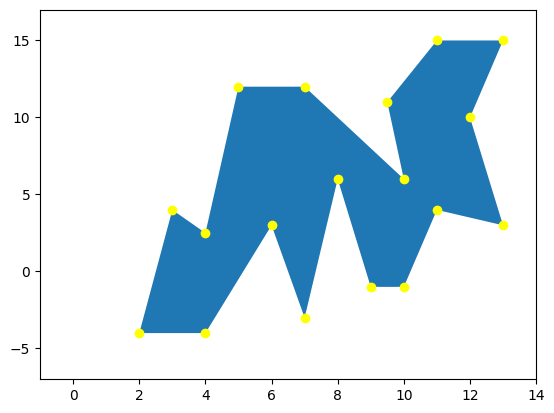

In [9]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
parche = []
for i in listaPuntos:
  parche.append((i.x,i.y))
polygon = Polygon(parche)
listaPuntosGraficaX = []
listaPuntosGraficaY = []
for i in listaPuntos:
  listaPuntosGraficaX.append(i.x)
  listaPuntosGraficaY.append(i.y)
fig, ax = plt.subplots(1,1)
ax.add_patch(polygon)
plt.scatter(listaPuntosGraficaX, listaPuntosGraficaY, c ="yellow")
plt.ylim(-7,17)
plt.xlim(-1,14)

##Vamos a encontrar la lista de aristas doblemente conectadas del poligono

In [10]:
class Nodo():
    def __init__(self, nombre, coordenadas, aristaIncidente):
        self.nombre = nombre
        self.coordenadas = coordenadas
        self.aristaIncidente = aristaIncidente
    def __repr__(self):
      return f"{self.nombre, self.coordenadas, self.aristaIncidente}"

In [11]:
listaNodos = []
for n in range(len(listaPuntos)):
  listaNodos.append(Nodo("n"+str(n),
                    listaPuntos[n],
                    "e"+str(n)+str(1)))

In [12]:
paraDataFrame = []
for n in range(len(listaPuntos)):

  paraDataFrame.append([listaNodos[n].nombre, listaNodos[n].coordenadas, listaNodos[n].aristaIncidente])

In [13]:
X = np.array(paraDataFrame, dtype=object)

In [14]:
df_nodos = pd.DataFrame(X, columns = ['Nodos', 'Coordenadas', 'Arista incidente'])
df_nodos.set_index('Nodos', inplace = True)



In [15]:
def twin(x):
  if x[-1] == "1":
    return str(x[:-1]+ "2")
  else:
    return x[:-1] + "1"

In [16]:
class semiArista():
  def __init__(self, nombre,  origen, coordenadas, gemelo, siguiente, previo, caraIncidente):
        self.nombre = nombre
        self.coordenadas = coordenadas
        self.origen = origen
        self.gemelo = gemelo
        self.siguiente = siguiente
        self.previo = previo
        self.caraIncidente = caraIncidente
        self.clasificacionOrigen = None
        self.helper = None
        self.poligonoLado = None
        self.color =None
  def __repr__(self):
    return f"{self.nombre, self.origen, self.coordenadas ,self.gemelo, self.siguiente, self.previo, self.caraIncidente, self.clasificacionOrigen, self.helper, self.poligonoLado, self.color}"

In [17]:
class cara():
  def __init__(self, cara, incidenteExterior, incidenteInterior):
        self.cara = cara
        self.incidenteExterior = incidenteExterior
        self.incidenteInterior = incidenteInterior
  def __repr__(self):
    return f"{self.cara, self.incidenteExterior, self.incidenteInterior}"

Encontremos la cara incidente

In [18]:
def asociarCara(semiaristas):
  menorNodo = encontrarMenorNodo(semiaristas)
  p0 = semiaristas[menorNodo[1]-1].coordenadas
  p1 = semiaristas[menorNodo[1]].coordenadas
  p2 = semiaristas[(menorNodo[1]+1)%len(listaPuntos)].coordenadas
  tmp = productoCruz2D(p0, p1, p2)
  if tmp == 'h':
    return (semiaristas[menorNodo[1]].nombre, "fInterior")
  if tmp == 'ah':
    return (semiaristas[menorNodo[1]].nombre, "fExterior")

In [19]:
semiaristas = []
semiaristasTwins = []
for n in range(len(listaPuntos)-1):
  semiaristas.append(semiArista(listaNodos[n].aristaIncidente,
                                 listaNodos[n].nombre,
                                 listaNodos[n].coordenadas,
                                 twin(listaNodos[n].aristaIncidente),
                                      listaNodos[n+1].aristaIncidente, #next
                                      listaNodos[n-1].aristaIncidente, #prev
                                      None))


semiaristas.append(semiArista(listaNodos[-1].aristaIncidente,
                                 listaNodos[-1].nombre,
                                 listaNodos[-1].coordenadas,
                                 twin(listaNodos[-1].aristaIncidente),
                                      listaNodos[0].aristaIncidente, #next
                                      listaNodos[-2].aristaIncidente, #prev
                                      None))
for n in range(len(listaPuntos)-1):
  semiaristasTwins.append(semiArista(twin(semiaristas[n].nombre),#nombre
                                 semiaristas[n+1].origen,#origen
                                 semiaristas[n+1].coordenadas,#coordenadas,
                                 semiaristas[n].nombre,#gemelo,
                                      twin(semiaristas[n].previo), #next
                                      twin(semiaristas[n].siguiente), #prev
                                      None))
semiaristasTwins.append(semiArista(twin(semiaristas[-1].nombre),
                                 semiaristas[0].origen,
                                 semiaristas[0].coordenadas,
                                 semiaristas[-1].nombre,
                                      twin(semiaristas[-1].previo), #next
                                      twin(semiaristas[-1].siguiente), #prev
                                      None))


Recorrer el poligono funcion que toma una lista de semiaristas y las ordena de tal forma que la semiarista n+1 en la posicion j en la lista es la siguiente de la semiarista n en la posicion j-1

In [20]:
def recorrerPoligono(semiaristas):
  recorrido = []
  primeraArista = semiaristas[0]
  primera = semiaristas[0].nombre
  siguiente = semiaristas[0].siguiente
  recorrido.append(primeraArista)
  semiaristas.pop(0)
  while (siguiente != primera):
    for i in range(0, len(semiaristas)):
      if semiaristas[i].nombre == siguiente:
        recorrido.append(semiaristas[i])
        siguiente = semiaristas[i].siguiente
        semiaristas.pop(i)
        break
  return semiaristas, recorrido

In [21]:
listaSemiarista = semiaristas+semiaristasTwins
listaSemiarista

[('e01', 'n0', (10.0,-1.0), 'e02', 'e11', 'e171', None, None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e01', None, None, None, None, None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', None, None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', None, None, None, None, None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', None, None, None, None, None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', None, None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e71', 'e51', None, None, None, None, None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e81', 'e61', None, None, None, None, None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e71', None, None, None, None, None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e101', 'e81', None, None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e91', None, None, None, None, None),
 ('e111', 'n11', (3.0,4.0), 'e112', 'e121', 'e101', None, None, None, None, None),
 ('e121', 'n12', (2.0,-4.0), 'e122', 'e

In [22]:
listaFinal = []
listaListasFinal = []
while len(listaSemiarista) != 0:
  tmp = recorrerPoligono(listaSemiarista)
  listaSemiarista = tmp[0]
  listaListasFinal.append(tmp[1])
  listaFinal = listaFinal + tmp[1]


In [23]:
listaFinal

[('e01', 'n0', (10.0,-1.0), 'e02', 'e11', 'e171', None, None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e01', None, None, None, None, None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', None, None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', None, None, None, None, None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', None, None, None, None, None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', None, None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e71', 'e51', None, None, None, None, None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e81', 'e61', None, None, None, None, None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e71', None, None, None, None, None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e101', 'e81', None, None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e91', None, None, None, None, None),
 ('e111', 'n11', (3.0,4.0), 'e112', 'e121', 'e101', None, None, None, None, None),
 ('e121', 'n12', (2.0,-4.0), 'e122', 'e

In [24]:
listaFinal

[('e01', 'n0', (10.0,-1.0), 'e02', 'e11', 'e171', None, None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e01', None, None, None, None, None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', None, None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', None, None, None, None, None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', None, None, None, None, None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', None, None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e71', 'e51', None, None, None, None, None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e81', 'e61', None, None, None, None, None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e71', None, None, None, None, None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e101', 'e81', None, None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e91', None, None, None, None, None),
 ('e111', 'n11', (3.0,4.0), 'e112', 'e121', 'e101', None, None, None, None, None),
 ('e121', 'n12', (2.0,-4.0), 'e122', 'e

In [25]:
len(listaListasFinal)

2

In [26]:
asociarCara(listaListasFinal[0])[0]

p1 esta rotado en sentido horario respecto a p2


'e121'

In [27]:
caras = []
for i in range(0, len(listaListasFinal)):
  carasTupla = asociarCara(listaListasFinal[i])
  caraa = carasTupla[1]+str(i)
  caras.append((carasTupla[0], caraa))
  for j in listaListasFinal[i]:
    j.caraIncidente = caraa

p1 esta rotado en sentido horario respecto a p2
p1 esta rotado en sentido antihorario respecto a p2


In [28]:
listaListasFinal

[[('e01', 'n0', (10.0,-1.0), 'e02', 'e11', 'e171', 'fExterior0', None, None, None, None),
  ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e01', 'fExterior0', None, None, None, None),
  ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', 'fExterior0', None, None, None, None),
  ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', 'fExterior0', None, None, None, None),
  ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', 'fExterior0', None, None, None, None),
  ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', 'fExterior0', None, None, None, None),
  ('e61', 'n6', (9.5,11.0), 'e62', 'e71', 'e51', 'fExterior0', None, None, None, None),
  ('e71', 'n7', (10.0,6.0), 'e72', 'e81', 'e61', 'fExterior0', None, None, None, None),
  ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e71', 'fExterior0', None, None, None, None),
  ('e91', 'n9', (5.0,12.0), 'e92', 'e101', 'e81', 'fExterior0', None, None, None, None),
  ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e91', 'fExterior0', None, None, None, None),
  ('e111', 'n11', (3.0,

Lista de caras

In [29]:
listaSemiaristas = []
for i in range(0, len(listaListasFinal)):
  for j in range(0, len(listaListasFinal[i])):
    listaSemiaristas.append(listaListasFinal[i][j])
listaSemiaristasDefinitiva = listaSemiaristas.copy()

In [30]:
caras

[('e121', 'fExterior0'), ('e112', 'fInterior1')]

In [31]:
listaCaras = []
for i in range(0, len(caras)):
  if "Exterior" in caras[i][1]:
    listaCaras.append(cara(caras[i][0], None, caras[i][1]))
  if "Interior" in caras[i][1]:
    listaCaras.append(cara(caras[i][0], caras[i][1], None))
listaCaras

[('e121', None, 'fExterior0'), ('e112', 'fInterior1', None)]

##Segundo Punto

In [32]:
listaNodos

[('n0', (10.0,-1.0), 'e01'),
 ('n1', (11.0,4.0), 'e11'),
 ('n2', (13.0,3.0), 'e21'),
 ('n3', (12.0,10.0), 'e31'),
 ('n4', (13.0,15.0), 'e41'),
 ('n5', (11.0,15.0), 'e51'),
 ('n6', (9.5,11.0), 'e61'),
 ('n7', (10.0,6.0), 'e71'),
 ('n8', (7.0,12.0), 'e81'),
 ('n9', (5.0,12.0), 'e91'),
 ('n10', (4.0,2.5), 'e101'),
 ('n11', (3.0,4.0), 'e111'),
 ('n12', (2.0,-4.0), 'e121'),
 ('n13', (4.0,-4.0), 'e131'),
 ('n14', (6.0,3.0), 'e141'),
 ('n15', (7.0,-3.0), 'e151'),
 ('n16', (8.0,6.0), 'e161'),
 ('n17', (9.0,-1.0), 'e171')]

In [33]:
listaFinal

[('e01', 'n0', (10.0,-1.0), 'e02', 'e11', 'e171', 'fExterior0', None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e01', 'fExterior0', None, None, None, None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', 'fExterior0', None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', 'fExterior0', None, None, None, None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', 'fExterior0', None, None, None, None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', 'fExterior0', None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e71', 'e51', 'fExterior0', None, None, None, None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e81', 'e61', 'fExterior0', None, None, None, None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e71', 'fExterior0', None, None, None, None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e101', 'e81', 'fExterior0', None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e91', 'fExterior0', None, None, None, None),
 ('e111', 'n11', (3.0,4.0), 'e112'

In [34]:
listaCaras

[('e121', None, 'fExterior0'), ('e112', 'fInterior1', None)]

##A continuación si tomo un polígono ordenado de manera antihoraria se clasifican sus vértices (terminado)

In [35]:
class punto:
    def __init__(self, x1, y1):
        self.x = x1
        self.y = y1
    def __str__(self):
        return ('('+str(self.x)+','+str(self.y)+')')
    def __repr__(self):
        return self.__str__()
def productoCruz2D(p0, p1, p2):
  det = ((p1.x-p0.x)*(p2.y-p0.y))-((p2.x-p0.x)*(p1.y-p0.y))
  if(det<0):
    return("h")
  elif(det>0):
    return("ah")
  else:
    print("colineales")

In [36]:
#listaPuntos = [punto(5,1), punto(8,3), punto(5,-2), punto(2,2), punto(-1, -1), punto(1,5)]
#listaPuntos = [punto(1,1), punto(-1,1), punto(-1,-1), punto(1,-1)]
#listaPuntos = [punto(2,2), punto(-2, 1), punto(-2, -1), punto(2, -1)]
#listaPuntos = [ punto(-1,1), punto(-1.2,5), punto(-2,4), punto(-3, 5), punto(-4.5 ,3.5), punto(-3.5, 2), punto(-3, -0.5), punto(-5,1.5), punto(-7, -3), punto(-6,-5), punto(-4,-4), punto(-3,-4.5), punto(-3.5,-2), punto(-0.3, -3),punto(0,0)]

In [37]:
def relacionDeOrden(punto1, punto2):
  if (punto1.y<punto2.y or (punto1.y == punto2.y and punto1.x>punto2.x)):
    return True
  else:
    return False
#recordar no se ha implementado aun colinealidad entre puntos
#recordar que lo hago asumiendo que el ultimo elemento de la lista va con el primero
def clasificarPuntos(listaPuntos):
  clasificacionPuntos = []
  for i in range(0, len(listaPuntos)):

    p0 = listaPuntos[i-2]
    p1 = listaPuntos[i-1]
    p2 = listaPuntos[i]
    tmp = productoCruz2D(p0, p1, p2)
    if (relacionDeOrden(p0,p1) and relacionDeOrden(p1, p2)) or (relacionDeOrden(p1,p0) and relacionDeOrden(p2, p1)): #si p1 es menos que p0 y p1 es mayor que p2 o visceversa
      clasificacionPuntos.append((p1, "regular"))
    elif (relacionDeOrden(p2,p1) and relacionDeOrden(p0, p1)):
      if tmp==("ah"):
        clasificacionPuntos.append((p1, "inicio"))
      else:
        clasificacionPuntos.append((p1, "division"))
    elif(relacionDeOrden(p1,p2) and relacionDeOrden(p1,p0)):
      if tmp==("ah"):
        clasificacionPuntos.append((p1, "fin"))
      else:
        clasificacionPuntos.append((p1, "union"))
  return clasificacionPuntos

In [38]:

clasificarPuntos(listaPuntos)

[((9.0,-1.0), 'regular'),
 ((10.0,-1.0), 'fin'),
 ((11.0,4.0), 'division'),
 ((13.0,3.0), 'fin'),
 ((12.0,10.0), 'regular'),
 ((13.0,15.0), 'regular'),
 ((11.0,15.0), 'inicio'),
 ((9.5,11.0), 'regular'),
 ((10.0,6.0), 'union'),
 ((7.0,12.0), 'regular'),
 ((5.0,12.0), 'inicio'),
 ((4.0,2.5), 'union'),
 ((3.0,4.0), 'inicio'),
 ((2.0,-4.0), 'regular'),
 ((4.0,-4.0), 'fin'),
 ((6.0,3.0), 'division'),
 ((7.0,-3.0), 'fin'),
 ((8.0,6.0), 'division')]

##A continuación si, trazamos una diagonal vamos a actualizar la lista de aristas doblemente conectadas (terminado)

In [39]:
listaSemiaristas

[('e01', 'n0', (10.0,-1.0), 'e02', 'e11', 'e171', 'fExterior0', None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e01', 'fExterior0', None, None, None, None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', 'fExterior0', None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', 'fExterior0', None, None, None, None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', 'fExterior0', None, None, None, None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', 'fExterior0', None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e71', 'e51', 'fExterior0', None, None, None, None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e81', 'e61', 'fExterior0', None, None, None, None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e71', 'fExterior0', None, None, None, None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e101', 'e81', 'fExterior0', None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e91', 'fExterior0', None, None, None, None),
 ('e111', 'n11', (3.0,4.0), 'e112'

In [40]:
listaSemiaristas[0].origen

'n0'

In [41]:
listaCaras

[('e121', None, 'fExterior0'), ('e112', 'fInterior1', None)]

In [42]:
listaNodos

[('n0', (10.0,-1.0), 'e01'),
 ('n1', (11.0,4.0), 'e11'),
 ('n2', (13.0,3.0), 'e21'),
 ('n3', (12.0,10.0), 'e31'),
 ('n4', (13.0,15.0), 'e41'),
 ('n5', (11.0,15.0), 'e51'),
 ('n6', (9.5,11.0), 'e61'),
 ('n7', (10.0,6.0), 'e71'),
 ('n8', (7.0,12.0), 'e81'),
 ('n9', (5.0,12.0), 'e91'),
 ('n10', (4.0,2.5), 'e101'),
 ('n11', (3.0,4.0), 'e111'),
 ('n12', (2.0,-4.0), 'e121'),
 ('n13', (4.0,-4.0), 'e131'),
 ('n14', (6.0,3.0), 'e141'),
 ('n15', (7.0,-3.0), 'e151'),
 ('n16', (8.0,6.0), 'e161'),
 ('n17', (9.0,-1.0), 'e171')]

In [43]:
#esta funcion toma una lista de semiaristas que tengan aristas de la forma "ek" para cambiar k por un numero
def actualizarNumero(listaSemiaristas):
  numeroMax = int(listaSemiaristas[0].nombre[1:-1])
  for i in listaSemiaristas:
    if (i.nombre[1:-1]) != "k":
      if int(i.nombre[1:-1]) > numeroMax or numeroMax == None:

        numeroMax = int(i.nombre[1:-1])
  numeroMax = numeroMax + 1
  for i in listaSemiaristas:
    if i.nombre == "ek1":
      i.nombre = "e"+str(numeroMax)+"1"

    if i.nombre == "ek2":
      i.nombre = "e"+str(numeroMax)+"2"

    if i.siguiente == "ek1":
      i.siguiente = "e"+str(numeroMax)+"1"
    if i.siguiente == "ek2":
      i.siguiente = "e"+str(numeroMax)+"2"
    if i.previo == "ek1":
      i.previo = "e"+str(numeroMax)+"1"
    if i.previo == "ek2":
      i.previo = "e"+str(numeroMax)+"2"
    if i.gemelo == "ek1":
      i.gemelo = "e"+str(numeroMax)+"1"
    if i.gemelo == "ek2":
      i.gemelo = "e"+str(numeroMax)+"2"

  return listaSemiaristas

In [44]:
def Next(semiaristaActual, listaSemiaristas):
  #devuelvo indice
  siguiente = semiaristaActual.siguiente
  for i in range(0, len(listaSemiaristas)):
      if listaSemiaristas[i].nombre == siguiente:
        return i
def Prev(semiaristaActual, listaSemiaristas):
  #devuelve indice
  previo = semiaristaActual.previo
  for i in range(0, len(listaSemiaristas)):
      if listaSemiaristas[i].nombre == previo:
        return i

In [45]:
#Recordar que tengo las semiaristas ordenadas donde las primeras son frontera
#exterior
def agregarDiagonal(listaSemiaristas, listaCaras, diagonal):
  #diagonal deberia ser una tupla de puntos que se agregara a la nueva lista de
  #aristas
  #print("imprimiendoSemiaristas")
  #for i in listaSemiaristas:

    #print(i)

  lista = listaSemiaristas.copy()
  semiaristaNueva1 = semiArista('ek2', diagonal[0].origen, diagonal[0].coordenadas,
                                twin('ek2'), None, None, None)
  semiaristaNueva2 = semiArista('ek1', diagonal[1].origen, diagonal[1].coordenadas,
                                twin('ek1'), None, None, None)
  semiaristasOrigen1 = []
  semiaristasOrigen2 = []
  for i in listaSemiaristas:
    if semiaristaNueva1.origen == i.origen:
      semiaristasOrigen1.append(i)
    if semiaristaNueva2.origen == i.origen:
      semiaristasOrigen2.append(i)
  #print("imprimiendo origen 1")
  #print(semiaristasOrigen1)
  #print("imprimiendo origen 2")
  #print(semiaristasOrigen2)
  semiarista1Try = [item for item in semiaristasOrigen1]
  semiarista2Try = [item for item in semiaristasOrigen2]
  semiaristasNuevo = []
  semiaristasNuevo = semiaristasOrigen1+semiaristasOrigen2
  for i in semiarista1Try:
    semiaristasNuevo.append(i)
   # print("Added to semiaristasOrigen1:", i)
  for i in semiarista2Try:
    semiaristasNuevo.append(i)
   # print("Added to semiaristasOrigen2:", i)
 # print("imprimiendo todas")
 # print("semiaristasNuevo")
 # print("imprimiendo semiaristas nuevo")

  for i in semiaristasNuevo:
    i
  semiaristasFinal = []
  count = 0
  #print('imprimiendo diagonal')
  #print(diagonal)
  for i in semiaristasNuevo:
    if 'Exterior' in i.caraIncidente:
      semiaristasFinal.append(i)
      count = count + 1
  caraExterior = semiaristasFinal[0].caraIncidente
  for i in listaSemiaristas:
    if caraExterior == i.caraIncidente:
      #print("encre")
      semiaristasFinal.append(i)
  semiaristasFinal = semiaristasFinal[count:]

  count2 = 0
  #for i in semiaristasFinal:
    #print (i)
  for i in semiaristasFinal:

    if i.origen == diagonal[0].origen:
      semiaristaOrigenVa = i
      break
    count2 = count2+1
  count3 = 0
  for i in semiaristasFinal:
    if i.origen == diagonal[1].origen:
      semiaristaOrigenVb = i
      #print("AAAAAAAA")
      break
    count3 = count3+1
  #print("BBB")
  previoVa = Prev(semiaristaOrigenVa, semiaristasFinal)

  semiaristasFinal[previoVa].siguiente = 'ek2'


  previoVb = Prev(semiaristaOrigenVb, semiaristasFinal)
  semiaristasFinal[previoVb].siguiente = 'ek1'

  semiaristaNueva1.previo = semiaristaOrigenVa.previo
  semiaristaNueva2.previo = semiaristaOrigenVb.previo

  semiaristaNueva1.siguiente = semiaristaOrigenVb.nombre
  semiaristaNueva2.siguiente = semiaristaOrigenVa.nombre

  semiaristasFinal[count2].previo = 'ek1'
  semiaristasFinal[count3].previo = 'ek2'



  semiaristasFinal.append(semiaristaNueva2)
  semiaristasFinal.append(semiaristaNueva1)
  for i in range(0, len(listaCaras)):
    if listaCaras[i].incidenteInterior == caraExterior:
      listaCaras.pop(i)
      break

  listaFinal = []
  listaListasFinal = []
  listaSemiarista = semiaristasFinal.copy()
  while len(listaSemiarista) != 0:
    tmp = recorrerPoligono(semiaristasFinal)
    listaSemiarista = tmp[0]
    listaListasFinal.append(tmp[1])
    listaFinal = listaFinal + tmp[1]
  numeroCaras = len(listaCaras)
  caras = []
  listaRetornar = []
  for i in range (0 ,len(listaListasFinal)):
    listaCaras.append(cara(listaListasFinal[i][0].nombre, None, "fExterior"+str(i+1+numeroCaras)))
    for j in listaListasFinal[i]:
      j.caraIncidente = "fExterior"+str(i+1+numeroCaras)
  listaFinal = []
  for i in range (0 ,len(listaListasFinal)):
    for j in listaListasFinal[i]:
      listaFinal.append(j)
  for i in range(0, len(listaFinal)):
    for j in range(0, len(listaSemiaristas)):
      if listaFinal[i].nombre == listaSemiaristas[j].nombre:
        lista[j].coordenadas = listaFinal[i].coordenadas
        lista[j].origen = listaFinal[i].origen
        lista[j].gemelo = listaFinal[i].gemelo
        lista[j].siguiente = listaFinal[i].siguiente
        lista[j].previo = listaFinal[i].previo
        lista[j].caraIncidente = listaFinal[i].caraIncidente
        break
  for i in listaFinal:
    if i.nombre == "ek1":
      lista.append(i)
    if i.nombre == "ek2":
      lista.append(i)
  listaSemiaristasActualizada = actualizarNumero(lista)
  #for i in listaSemiaristasActualizada:
    #print(i)
  #fexterior significa que es frontera exterior de una cara
  #A continuacion se presenta el resultado de las listas de aristas
  #doblemente conectadas con el ejemplo de la imagen que esta en el
  #quiz
  listaFinal = actualizarNumero(listaFinal)
  return listaSemiaristasActualizada, listaCaras

#listaFinal, listaCaras = agregarDiagonal(listaSemiaristas, listaCaras, (listaSemiaristas[0], listaSemiaristas[-2]))


In [46]:
#for i in listaFinal:
  #print(i)

##Divisiones Y-Monotonas

In [47]:
def Next(semiaristaActual, listaSemiaristas):
  #devuelvo indice
  siguiente = semiaristaActual.siguiente
  for i in range(0, len(listaSemiaristas)):
      if listaSemiaristas[i].nombre == siguiente:
        return i
def Prev(semiaristaActual, listaSemiaristas):
  #devuelve indice
  previo = semiaristaActual.previo
  for i in range(0, len(listaSemiaristas)):
      if listaSemiaristas[i].nombre == previo:
        return i
  #devuelve indice
def encontrarSemiaristaSemiarista(nodo, listaSemiaristas):
  for i in range (0,len(listaSemiaristas)):
    #print("a")
    #print(listaSemiaristas[i].origen, nodo.nombre)
    if listaSemiaristas[i].origen == nodo.nombre:
        return i
def encontrarSemiarista(semiarista, listaSemiaristas):
  for i in range (0,len(listaSemiaristas)):
    #print("a")
    #print(listaSemiaristas[i].origen, semiarista.nombre)
    if listaSemiaristas[i].nombre == semiarista.nombre:
        return i

In [48]:
class segmento:
    def __init__(self, p1, p2):
        self.pInicial = p1
        self.pFinal = p2
    def __str__(self):
        return ('('+str(self.pInicial)+','+str(self.pFinal)+')')
    def __repr__(self):
        return str(self)

In [49]:
class Node:
  def __init__(self, data):
    self.data = data
    self.left = None
    self.right = None
    self.leaf = None
def insertBST2Dim(root, node):

    if node.data.coordenadas.y > root.data.coordenadas.y or (node.data.coordenadas.y == root.data.coordenadas.y and node.data.coordenadas.x < root.data.coordenadas.x):
        if root.left is None:
          root.left = node
        else:
          insertBST2Dim(root.left, node)
    else:
        if root.right is None:
            root.right = node
        else:
            insertBST2Dim(root.right, node)



def actualizarHelper(root, semiaristaNombre, helperSemiarista):
  #nombre de la semiarista y el helper que le vamos a poner
  #semiaristaNombre (string)
  #root root de un arbol (nodo)
  #helperSemiarista coordenada (punto)
  if (root == None):
      return False
  if (root.data.nombre == semiaristaNombre):
      root.data.helper = helperSemiarista
  izquierda = actualizarHelper(root.left, semiaristaNombre, helperSemiarista)
  derecha = actualizarHelper(root.right, semiaristaNombre, helperSemiarista)
  if izquierda == False:
    return derecha
  else:
    return izquierda


def inOrder(root):
  inOrderArr = []
  if root.left is not None:
    leftinOrderArr = inOrder(root.left)
    inOrderArr.extend(leftinOrderArr)
  inOrderArr.append(root.data)
  if root.right is not None:
    rightinOrderArr = inOrder(root.right)
    inOrderArr.extend(rightinOrderArr)
  return inOrderArr

def encontrarHelper(node, helper):
  #retorna la semiarista
  if (node == None):
      return False
  if (node.data.coordenadas.x == helper.x and node.data.coordenadas.y == helper.y):
      return node.data
  izquierda = encontrarHelper(node.left, helper)
  derecha = encontrarHelper(node.right, helper)
  if izquierda == False:
    return derecha
  else:
    return izquierda



#este codigo para borrar nodos fue tomado de
#https://www.geeksforgeeks.org/deletion-in-binary-search-tree/
#y fue adaptado para un arbol de semiaristas
def deleteNode(root, k):
  if root is None:
      return root
  if k.coordenadas.y > root.data.coordenadas.y or (k.coordenadas.y == root.data.coordenadas.y and k.coordenadas.x < root.data.coordenadas.x):
      root.left = deleteNode(root.left, k)
      return root
  elif k.coordenadas.y < root.data.coordenadas.y or (k.coordenadas.y == root.data.coordenadas.y and k.coordenadas.x > root.data.coordenadas.x):
      #print("b")
      root.right = deleteNode(root.right, k)
      return root
  if root.left is None:
      #print("c")
      temp = root.right
      del root
      return temp
  elif root.right is None:
      #print("d")
      temp = root.left
      del root
      return temp


  else:
      #print("e")
      succParent = root


      succ = root.right
      while succ.left is not None:
          succParent = succ
          succ = succ.left


      if (succParent.data.coordenadas.x != root.data.coordenadas.x) and (succParent.data.coordenadas.y != root.data.coordenadas.y):
          succParent.left = succ.right
      else:
          succParent.right = succ.right

      root.data = succ.data

      del succ
      return root
"""
def encontrarElementoIzquierda(root, target):
    current = root
    left_leaf = None

    while current:
        if target.coordenadas.y < current.data.coordenadas.y or (target.coordenadas.y == current.data.coordenadas.y and target.coordenadas.x < current.data.coordenadas.x):
            left_leaf = current  # Guarda el nodo actual como la hoja izquierda
            current = current.left  # Muevete hacia la izquierda
        else:
            current = current.right  # Muevete hacia la derecha

    return left_leaf
"""
def encontrarElementoIzquierda(root, target):
  lista = inOrder(root)
  if len(lista)==1:
    return root.data
  for i in range(0, len(lista)-1):
    condicion1 = lista[i+1].coordenadas.y<target.coordenadas.y and lista[i].coordenadas.y>target.coordenadas.y
    #condicion2 = lista[i+1].coordenadas.y==target.coordenadas.y and lista[i].coordenadas.y>target.coordenadas.y
    condicion2 = lista[i+1].coordenadas.y==target.coordenadas.y and lista[i+1].coordenadas.x>target.coordenadas.x and lista[i].coordenadas.y>target.coordenadas.y

    condicion3 = lista[i+1].coordenadas.y<target.coordenadas.y and lista[i].coordenadas.x<target.coordenadas.x and lista[i].coordenadas.y==target.coordenadas.y
    if condicion1 or condicion2 or condicion3:
      return lista[i]
  return lista[-1]

"""id?
def encontrarElementoIzquierda(root, nodoObjetivo):
    if root is None:
        return None

    nodoActual = root
    nodoAnterior = None

    while nodoActual is not None and nodoActual.data.coordenadas.x != nodoObjetivo.coordenadas.x and nodoActual.data.coordenadas.y != nodoObjetivo.coordenadas.y:
        nodoAnterior = nodoActual
        if nodoObjetivo.coordenadas.y > root.data.coordenadas.y or (nodoObjetivo.coordenadas.y == root.data.coordenadas.y and nodoObjetivo.coordenadas.x < root.data.coordenadas.x):
            nodoActual = nodoActual.left
        else:
            nodoActual = nodoActual.right

    if nodoActual is None:
        return None
    else:
        if nodoAnterior is not None:
            return nodoAnterior.data
        else:
            return None
"""

'id?\ndef encontrarElementoIzquierda(root, nodoObjetivo):\n    if root is None:\n        return None\n\n    nodoActual = root\n    nodoAnterior = None\n\n    while nodoActual is not None and nodoActual.data.coordenadas.x != nodoObjetivo.coordenadas.x and nodoActual.data.coordenadas.y != nodoObjetivo.coordenadas.y:\n        nodoAnterior = nodoActual\n        if nodoObjetivo.coordenadas.y > root.data.coordenadas.y or (nodoObjetivo.coordenadas.y == root.data.coordenadas.y and nodoObjetivo.coordenadas.x < root.data.coordenadas.x):\n            nodoActual = nodoActual.left\n        else:\n            nodoActual = nodoActual.right\n\n    if nodoActual is None:\n        return None\n    else:\n        if nodoAnterior is not None:\n            return nodoAnterior.data\n        else:\n            return None\n'

In [50]:
"""
xc = a.copy()
root = Node(a[0])
xc.pop(0)
while len(xc):
  insertBST2Dim(root, Node(xc[0]))
  xc.pop(0)
colaOrdenada = inOrder(root)
"""

'\nxc = a.copy()\nroot = Node(a[0])\nxc.pop(0)\nwhile len(xc):\n  insertBST2Dim(root, Node(xc[0]))\n  xc.pop(0)\ncolaOrdenada = inOrder(root)\n'

In [51]:
#p=deleteNode(root, a[0])

In [52]:
#print(a[0])

In [53]:
#z = inOrder(root)

In [54]:
#z

In [55]:
#for i in z:
  #print(i)

In [56]:
#encontrarElementoIzquierda(root, z[2])

In [57]:
#actualizarHelper(p, z[5].nombre, z[0].coordenadas)

In [58]:
#z = inOrder(p)

In [59]:
#z[5].helper

In [60]:
#z[0].coordenadas

In [61]:
#encontrarHelper(p, punto(-1.2,5))

In [62]:

#len(colaOrdenada)

In [63]:
"""
def divisionesYMonotonas(listaSemiaristasPoligono, listaVertices):
  #TODO(?): QUITAR ACTUALIZAR HELPERS CON ARBOLES
  #SOLO ACTUALIZQA
  poligonoAntiHorario = recorrerPoligono(listaSemiaristasPoligono)[1]
  puntosAClasificar = []
  for i in poligonoAntiHorario:
    puntosAClasificar.append(i.coordenadas)
  clasificacionPuntos = clasificarPuntos(puntosAClasificar)
  #print(len(poligonoAntiHorario))
  #print(len(clasificacionPuntos))
  #for i in range(0, len(poligonoAntiHorario)):
    #print(poligonoAntiHorario[i])
  #for i in range(0, len(clasificacionPuntos)):
    #print(clasificacionPuntos[i])
  for j in range(0, len(poligonoAntiHorario)):
    #print(j)
    poligonoAntiHorario[j-1].clasificacionOrigen = clasificacionPuntos[j][1]
  #implementar derecha e izquierda
  for i in range(0, len(poligonoAntiHorario)):
    if poligonoAntiHorario[i].clasificacionOrigen == "regular":
      if poligonoAntiHorario[i].coordenadas.y > poligonoAntiHorario[i-1].coordenadas.y or (poligonoAntiHorario[i].coordenadas.y == poligonoAntiHorario[i-1].coordenadas.y and poligonoAntiHorario[i].coordenadas.x < poligonoAntiHorario[i-1].coordenadas.x):
        poligonoAntiHorario[i].poligonoLado = "izquierda"
      else:
        poligonoAntiHorario[i].poligonoLado = "derecha"
  print(poligonoAntiHorario)
  #creacion de la cola Q
  xc = listaNodos.copy()
  root = Node(xc[0])
  xc.pop(0)
  while len(xc):
    insertBST2Dim(root, Node(xc[0]))
    xc.pop(0)
  colaOrdenada = inOrder(root)
  arbol = Node(None)
  tmp = None
  #return colaOrdenada
  diagonales = []
  #print("colaOrdenada")
  for i in colaOrdenada:
    print(i)
  while len(colaOrdenada) != 0:
    verticeAManipular = colaOrdenada[0]
    indice = encontrarSemiaristaSemiarista(verticeAManipular, poligonoAntiHorario)
    elementoAManipular = poligonoAntiHorario[indice]
    colaOrdenada.pop(0)
    #################################         INICIO
    if elementoAManipular.clasificacionOrigen == "inicio":
      poligonoAntiHorario[indice].helper = elementoAManipular.coordenadas
      elementoAManipular.helper = elementoAManipular.coordenadas
      if arbol.data == None:
        arbol.data = elementoAManipular
      else:
        insertBST2Dim(arbol, Node(elementoAManipular))
    #############################    FIN
    elif elementoAManipular.clasificacionOrigen == "fin":
      tmp =  poligonoAntiHorario[Prev(elementoAManipular, poligonoAntiHorario)]
      helperTmp = encontrarHelper(poligonoAntiHorario, tmp.helper)
      if helperTmp.clasificacionOrigen == "union":
        diagonales.append((helperTmp, elementoAManipular))
      arbol = deleteNode(arbol, tmp)
    ############################# UNION
    elif elementoAManipular.clasificacionOrigen == "union":
      tmp =  poligonoAntiHorario[Prev(elementoAManipular, poligonoAntiHorario)]
      helperTmp = encontrarHelper(poligonoAntiHorario, tmp.helper)
      if helperTmp.clasificacionOrigen == "union":
        diagonales.append((helperTmp, elementoAManipular))
      arbol = deleteNode(arbol, tmp)
      elementoIzquierdo = encontrarElementoIzquierda(arbol, elementoAManipular)
      helper = encontrarHelper(poligonoAntiHorario, elementoIzquierdo.helper)
      indiceIzquierdo = encontrarSemiarista(elementoIzquierdo, poligonoAntiHorario)
      poligonoAntiHorario[indiceIzquierdo].helper = elementoAManipular.coordenadas
      if helper.clasificacionOrigen == "union":
        diagonales.append((elementoAManipular, helper))
      #actualizar helper

      #actualizarHelper(arbol, elementoIzquierdo.nombre, elementoAManipular.coordenadas)
    ################################# DIVISION
    elif elementoAManipular.clasificacionOrigen == "division":
      elementoIzquierdo = encontrarElementoIzquierda(arbol, elementoAManipular)
      helperTmp = encontrarHelper(poligonoAntiHorario, elementoIzquierdo.helper)
      diagonales.append((helperTmp, elementoAManipular))
      #actualizarHelper(arbol, elementoIzquierdo.nombre, elementoAManipular.coordenadas)
      #print("aaaa", verticeAManipular, poligonoAntiHorario)
      indice = encontrarSemiaristaSemiarista(verticeAManipular, poligonoAntiHorario)
      poligonoAntiHorario[indice].helper = elementoAManipular.coordenadas
      indiceIzquierdo = encontrarSemiarista(elementoIzquierdo, poligonoAntiHorario)

      #aqui error

      poligonoAntiHorario[indiceIzquierdo].helper = elementoAManipular.coordenadas
      elementoAManipular.helper = elementoAManipular.coordenadas
      insertBST2Dim(arbol, Node(elementoAManipular))




    ################################    REGULAR

    elif elementoAManipular.clasificacionOrigen == "regular":
      if elementoAManipular.poligonoLado == "derecha":
        #print("aaaaa")
        #print(inOrder(arbol))
        #print("BBBBBBBBBB", inOrder(arbol))
        tmp =  poligonoAntiHorario[Prev(elementoAManipular, poligonoAntiHorario)]
        #print("anterior", tmp)
        helperTmp = encontrarHelper(poligonoAntiHorario, tmp.helper)
        #print("x",helperTmp)
        if helperTmp.clasificacionOrigen == "union":
          diagonales.append((elementoAManipular, helperTmp))

        arbol = deleteNode(arbol, tmp)
      #print("test")

        elementoAManipular.helper = elementoAManipular.coordenadas
        if arbol == None:

          arbol = Node(elementoAManipular)
        elif arbol.data == None:
          arbol.data = elementoAManipular
        else:
          insertBST2Dim(arbol, Node(elementoAManipular))
    elif elementoAManipular.poligonoLado == "izquierda":
      print("izquierdaaa")
      print(elementoAManipular)
      print(inOrder(arbol))
      elementoIzquierdo = encontrarElementoIzquierda(arbol, elementoAManipular)
      print("izquierdopooooo")
      print(elementoIzquierdo)
      #error por aqui prob
      helper = encontrarHelper(poligonoAntiHorario, elementoIzquierdo.helper)
      if helper.clasificacionOrigen == "union":
        diagonales.append((elementoAManipular, helper))
      #actualizarHelper(arbol, elementoIzquierdo.nombre, elementoAManipular.coordenadas)
      indiceIzquierdo = encontrarSemiarista(elementoIzquierdo, poligonoAntiHorario)
      poligonoAntiHorario[indiceIzquierdo].helper = elementoAManipular.coordenadas
    else:
      print("quemondddddddddddddddddddddddda")
  #error con esto, si por ejemplo tengo vi va asociada con una arista

    #print("tmp", tmp)
    print("diag",diagonales)
  return diagonales
"""

'\ndef divisionesYMonotonas(listaSemiaristasPoligono, listaVertices):\n  #TODO(?): QUITAR ACTUALIZAR HELPERS CON ARBOLES\n  #SOLO ACTUALIZQA\n  poligonoAntiHorario = recorrerPoligono(listaSemiaristasPoligono)[1]\n  puntosAClasificar = []\n  for i in poligonoAntiHorario:\n    puntosAClasificar.append(i.coordenadas)\n  clasificacionPuntos = clasificarPuntos(puntosAClasificar)\n  #print(len(poligonoAntiHorario))\n  #print(len(clasificacionPuntos))\n  #for i in range(0, len(poligonoAntiHorario)):\n    #print(poligonoAntiHorario[i])\n  #for i in range(0, len(clasificacionPuntos)):\n    #print(clasificacionPuntos[i])\n  for j in range(0, len(poligonoAntiHorario)):\n    #print(j)\n    poligonoAntiHorario[j-1].clasificacionOrigen = clasificacionPuntos[j][1]\n  #implementar derecha e izquierda\n  for i in range(0, len(poligonoAntiHorario)):\n    if poligonoAntiHorario[i].clasificacionOrigen == "regular":\n      if poligonoAntiHorario[i].coordenadas.y > poligonoAntiHorario[i-1].coordenadas.y or 

##Punto 3

In [64]:
#EL ALGORITMO NO FUNCIONA, PARA LA TRIANGULACION SE HIZO YMONOTONOS A MANO
def divisionesYMonotonas(listaSemiaristasPoligono, listaVertices):
  poligonoAntiHorario = recorrerPoligono(listaSemiaristasPoligono)[1]
  puntosAClasificar = []
  for i in poligonoAntiHorario:
    puntosAClasificar.append(i.coordenadas)
  clasificacionPuntos = clasificarPuntos(puntosAClasificar)
  for j in range(0, len(poligonoAntiHorario)):
    poligonoAntiHorario[j-1].clasificacionOrigen = clasificacionPuntos[j][1]
  for i in range(0, len(poligonoAntiHorario)):
    if poligonoAntiHorario[i].clasificacionOrigen == "regular":
      if poligonoAntiHorario[i].coordenadas.y > poligonoAntiHorario[i-1].coordenadas.y or (poligonoAntiHorario[i].coordenadas.y == poligonoAntiHorario[i-1].coordenadas.y and poligonoAntiHorario[i].coordenadas.x < poligonoAntiHorario[i-1].coordenadas.x):
        poligonoAntiHorario[i].poligonoLado = "izquierda"
      else:
        poligonoAntiHorario[i].poligonoLado = "derecha"
  xc = listaNodos.copy()
  root = Node(xc[0])
  xc.pop(0)
  while len(xc):
    insertBST2Dim(root, Node(xc[0]))
    xc.pop(0)
  colaOrdenada = inOrder(root)
  arbol = Node(None)
  tmp = None
  #return colaOrdenada
  diagonales = []
  #print("colaOrdenada")
  for i in colaOrdenada:
    print(i)
  count = 0

  while len(colaOrdenada) != 0:
    verticeAManipular = colaOrdenada[0]
    indice = encontrarSemiaristaSemiarista(verticeAManipular, poligonoAntiHorario)
    elementoAManipular = poligonoAntiHorario[indice]
    colaOrdenada.pop(0)
    print("iteracion " + str(count))
    print("elem",elementoAManipular)
    print("arbol en iteracion " + str(count))
    print(inOrder(arbol))


    #################################         INICIO
    if elementoAManipular.clasificacionOrigen == "inicio":
        elementoAManipular.helper = elementoAManipular.coordenadas
        print("a")
        if arbol.data != None:
          insertBST2Dim(arbol, Node(elementoAManipular))
        elif arbol.data == None:
          arbol = Node(elementoAManipular)
        print("elem",elementoAManipular)

        #actualizarHelper(arbol, elementoAManipular.nombre, elementoAManipular.coordenadas)
    #############################    FIN
    elif elementoAManipular.clasificacionOrigen == "fin":
      elementoAnterior =  poligonoAntiHorario[Prev(elementoAManipular, poligonoAntiHorario)]
      helperAnterior = encontrarHelper(arbol, elementoAnterior.helper)
      if helperAnterior.clasificacionOrigen == "union":
        diagonales.append(elementoAManipular, helperAnterior)
      arbol = deleteNode(arbol, elementoAnterior)
    ################################# DIVISION
    elif elementoAManipular.clasificacionOrigen == "division":
      elementoIzquierdo = encontrarElementoIzquierda(arbol, elementoAManipular)
      helperIzquierdo = encontrarHelper(arbol, elementoIzquierdo.helper)
      diagonales.append((elementoAManipular, helperIzquierdo))
      elementoAManipular.helper = elementoAManipular.coordenadas
      insertBST2Dim(arbol, Node(elementoAManipular))

      #actualizarHelper(arbol, elementoAManipular, elementoAManipular.coordenadas)
    ############################# UNION
    elif elementoAManipular.clasificacionOrigen == "union":
      elementoAnterior =  poligonoAntiHorario[Prev(elementoAManipular, poligonoAntiHorario)]
      helperAnterior = encontrarHelper(arbol, elementoAnterior.helper)
      if helperAnterior.clasificacionOrigen == "union":
        diagonales.append((elementoAManipular,helperAnterior))
      arbol = deleteNode(arbol, elementoAnterior)
      elementoIzquierdo = encontrarElementoIzquierda(arbol, elementoAManipular)
      print("elementoIzquierdo caso union", elementoIzquierdo)
      helperIzquierdo = encontrarHelper(arbol, elementoIzquierdo.helper)
      elementoIzquierdo.helper = elementoAManipular.coordenadas
      if helperIzquierdo.clasificacionOrigen == "union":
        diagonales.append((elementoAManipular, helperIzquierdo))
      arbol = deleteNode(arbol, elementoIzquierdo)
      insertBST2Dim(arbol, elementoIzquierdo)
      actualizarHelper(arbol, elementoIzquierdo, elementoAManipular.coordenadas)
    ################################    REGULAR

    elif elementoAManipular.clasificacionOrigen == "regular":
      if elementoAManipular.poligonoLado == "derecha":
        elementoAnterior =  poligonoAntiHorario[Prev(elementoAManipular, poligonoAntiHorario)]
        print("elemento Anterior", elementoAnterior)
        helperAnterior = encontrarHelper(arbol, elementoAnterior.helper)
        if helperAnterior.clasificacionOrigen == "union":
          diagonales.append((elementoAManipular,helperAnterior))
        print("casoregular derecha arbol", inOrder(arbol))
        arbol = deleteNode(arbol, elementoAnterior)
        elementoAManipular.helper = elementoAManipular.coordenadas


        if arbol != None:
          insertBST2Dim(arbol, Node(elementoAManipular))
        else:
          arbol = Node(elementoAManipular)
        #actualizarHelper(arbol, elementoAManipular, elementoAManipular.coordenadas)

        print("inorder arbol regular", inOrder(arbol))
      elif elementoAManipular.poligonoLado == "izquierda":
        print("Caso union izquierda", "elem manipular")
        print(elementoAManipular)
        print(inOrder(arbol))
        elementoIzquierdo = encontrarElementoIzquierda(arbol, elementoAManipular)
        print("elem izquierdo",elementoIzquierdo)
        helperIzquierdo = encontrarHelper(arbol, elementoIzquierdo.helper)
        if helperIzquierdo.clasificacionOrigen == "union":
          diagonales.append((elementoAManipular, helperIzquierdo))
        print("siuuu")

        arbol = deleteNode(arbol, elementoIzquierdo)
        elementoIzquierdo.helper = elementoAManipular.coordenadas
        if arbol!=None:
          insertBST2Dim(arbol, Node(elementoIzquierdo))

        else:
          arbol = Node(elementoIzquierdo)


       # actualizarHelper(arbol, elementoIzquierdo, elementoAManipular.coordenadas)

      else:
        print("!!!!!!!!!!!!!!")
    count = count+1


  return diagonales


In [65]:
#listaSemiaristasPoligono = listaFinal.copy()
#a=divisionesYMonotonas(listaSemiaristasPoligono, listaNodos)

In [66]:
def actualizarListaYMonotona(listaSemiaristas, listaCaras, listaDiagonales):
  nuevaListaSemiaristas = [item for item in listaSemiaristas]
  nuevaListaCaras = [item for item in listaCaras]

  for i in range(0, len(listaDiagonales)):
    nuevaListaSemiaristas, nuevaListaCaras = agregarDiagonal(nuevaListaSemiaristas, nuevaListaCaras, listaDiagonales[i])
  return nuevaListaSemiaristas, nuevaListaCaras

Se hizo y monotonos a mano porque mi algoritmo no funcionaba

In [67]:
#y monotonos a mano
a = ((listaFinal[7], listaFinal[1]), (listaFinal[16], listaFinal[8]), (listaFinal[14], listaFinal[16]), (listaFinal[12], listaFinal[10]))
#listaActualizadaYMonotona, listaCarasActualizadaYMonotona = actualizarListaYMonotona(listaFinal, listaCaras, a)

In [68]:
listaActualizadaYMonotona, listaCarasActualizadaYMonotona = actualizarListaYMonotona(listaSemiaristas, listaCaras, a)

In [69]:
listaActualizadaYMonotona

[('e01', 'n0', (10.0,-1.0), 'e02', 'e181', 'e171', 'fExterior3', None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e182', 'fExterior3', None, None, None, None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e31', 'e11', 'fExterior3', None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', 'fExterior3', None, None, None, None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', 'fExterior3', None, None, None, None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e61', 'e41', 'fExterior3', None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e51', 'fExterior3', None, None, None, None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e181', 'fExterior3', None, None, None, None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e91', 'e192', 'fExterior5', None, None, None, None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e211', 'e81', 'fExterior5', None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e212', 'fExterior6', None, None, None, None),
 ('e111', 'n11', (3.0,4.0),

In [70]:
def obtenerPoligonos(listaa):
  listaFinal = []
  listaListasFinal = []
  while len(listaa) != 0:
    tmp = recorrerPoligono(listaa)
    listaa = tmp[0]
    listaListasFinal.append(tmp[1])
    listaFinal = listaFinal + tmp[1]
  for i in range(0, len(listaListasFinal)):
    if 'Interior' in listaListasFinal[i][0].caraIncidente:
      listaListasFinal.pop(i)
  return listaListasFinal

In [71]:
listaPoligonosYMonotonos = listaActualizadaYMonotona.copy()
yMonotonosFinal = obtenerPoligonos(listaPoligonosYMonotonos)

In [72]:

def encontrarMasAlto(poligonoYMonotono):
  masAlto = poligonoYMonotono[0]
  for i in range(0, len(poligonoYMonotono)):
    if masAlto.coordenadas.y<poligonoYMonotono[i].coordenadas.y or (masAlto.coordenadas.y==poligonoYMonotono[i].coordenadas.y and masAlto.coordenadas.x > poligonoYMonotono[i].coordenadas.x):
      masAlto = poligonoYMonotono[i]
  return masAlto

def encontrarMasBajo(poligonoYMonotono):
  masBajo = poligonoYMonotono[0]
  for i in range(0, len(poligonoYMonotono)):
    if not(masBajo.coordenadas.y<poligonoYMonotono[i].coordenadas.y or (masBajo.coordenadas.y==poligonoYMonotono[i].coordenadas.y and masBajo.coordenadas.x > poligonoYMonotono[i].coordenadas.x)):
      masBajo = poligonoYMonotono[i]
  return masBajo

In [73]:
def recorrerDerecha(listaSemiaristas):
  actual = encontrarMasAlto(listaSemiaristas)
  masBaja = encontrarMasBajo(listaSemiaristas)
  while actual.nombre != masBaja.nombre:
    actual = Prev(actual, listaSemiaristas)
    if listaSemiaristas[actual].nombre != masBaja.nombre:
      listaSemiaristas[actual].poligonoLado = "d"
    actual =  listaSemiaristas[actual]
  return listaSemiaristas
def recorrerIzquierda(listaSemiaristas):
  actual = encontrarMasAlto(listaSemiaristas)
  masBaja = encontrarMasBajo(listaSemiaristas)
  while actual.nombre != masBaja.nombre:
    actual = Next(actual, listaSemiaristas)
    if listaSemiaristas[actual].nombre != masBaja.nombre:
      listaSemiaristas[actual].poligonoLado = "i"
    actual =  listaSemiaristas[actual]
  return listaSemiaristas


##Punto 4

In [74]:
def triangularYMonotonos(poligonoYMonotono):
  recorrerDerecha(poligonoYMonotono)
  recorrerIzquierda(poligonoYMonotono)
  masAlto = encontrarMasAlto(poligonoYMonotono)
  xc = poligonoYMonotono.copy()
  root = Node(xc[0])
  xc.pop(0)
  while len(xc):
    insertBST2Dim(root, Node(xc[0]))
    xc.pop(0)
  colaOrdenada = inOrder(root)
  stack = [colaOrdenada[0], colaOrdenada[1]]
  diagonales = []
  for j in range(2, len(colaOrdenada)-1):
    #do if uj and the vertex on top of S are on different chains
    print(diagonales)
    if colaOrdenada[j].poligonoLado != stack[-1].poligonoLado:
      while stack:

        if len(stack)!=1:
          print("diagonal anadida")
          diagonales.append((colaOrdenada[j], stack[-1]))
          print((colaOrdenada[j], stack[-1]))
          stack.pop()
          print(len(stack))


        else:
          stack.pop()


      stack.append(colaOrdenada[j-1])
      stack.append(colaOrdenada[j])
    else:
      previo = stack[-1]
      stack.pop()
      giroBool = True
      while stack and giroBool:

        tipoGiro = productoCruz2D(stack[-1].coordenadas, previo.coordenadas, colaOrdenada[j].coordenadas)
        giroBool = False
        if colaOrdenada[j].poligonoLado == "i":
          if tipoGiro == "ah":
            giroBool = True
        if colaOrdenada[j].poligonoLado == "d":
          if tipoGiro == "h":
            giroBool = True
        diagonales.append((stack[-1], colaOrdenada[j]))
        previo = stack[-1]
        stack.pop()
      stack.append(previo)
      stack.append(colaOrdenada[j])

  stack.pop()
  stack.pop(0)
  for i in range(0, len(stack)):
    diagonales.append((colaOrdenada[-1], stack[i]))

  return diagonales

In [75]:
listaListasDiagonales = []
for i in yMonotonosFinal:
  listaListasDiagonales.append(triangularYMonotonos(i))

[]
diagonal anadida
(('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e181', 'fExterior3', None, None, 'd', None), ('e161', 'n16', (8.0,6.0), 'e162', 'e171', 'e191', 'fExterior3', None, None, 'i', None))
1
[(('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e181', 'fExterior3', None, None, 'd', None), ('e161', 'n16', (8.0,6.0), 'e162', 'e171', 'e191', 'fExterior3', None, None, 'i', None))]
[(('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e181', 'fExterior3', None, None, 'd', None), ('e161', 'n16', (8.0,6.0), 'e162', 'e171', 'e191', 'fExterior3', None, None, 'i', None)), (('e161', 'n16', (8.0,6.0), 'e162', 'e171', 'e191', 'fExterior3', None, None, 'i', None), ('e181', 'n1', (11.0,4.0), 'e182', 'e71', 'e01', 'fExterior3', None, None, 'd', None))]
diagonal anadida
(('e171', 'n17', (9.0,-1.0), 'e172', 'e01', 'e161', 'fExterior3', None, None, 'i', None), ('e181', 'n1', (11.0,4.0), 'e182', 'e71', 'e01', 'fExterior3', None, None, 'd', None))
1
[]
diagonal anadida
(('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e51', 

Se ponen todos los triangulos en una lista

In [76]:
diagonalesTriangulos = []
for i in range(0, len(listaListasDiagonales)):
  if len(listaListasDiagonales[i])!=0:
      for j in range(0, len(listaListasDiagonales[i])):
        diagonalesTriangulos.append(listaListasDiagonales[i][j])
diagonalesTriangulos

[(('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e181', 'fExterior3', None, None, 'd', None),
  ('e161', 'n16', (8.0,6.0), 'e162', 'e171', 'e191', 'fExterior3', None, None, 'i', None)),
 (('e161', 'n16', (8.0,6.0), 'e162', 'e171', 'e191', 'fExterior3', None, None, 'i', None),
  ('e181', 'n1', (11.0,4.0), 'e182', 'e71', 'e01', 'fExterior3', None, None, 'd', None)),
 (('e171', 'n17', (9.0,-1.0), 'e172', 'e01', 'e161', 'fExterior3', None, None, 'i', None),
  ('e181', 'n1', (11.0,4.0), 'e182', 'e71', 'e01', 'fExterior3', None, None, 'd', None)),
 (('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e51', 'fExterior3', None, None, 'i', None),
  ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e31', 'fExterior3', None, None, 'd', None)),
 (('e31', 'n3', (12.0,10.0), 'e32', 'e41', 'e21', 'fExterior3', None, None, 'd', None),
  ('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e51', 'fExterior3', None, None, 'i', None)),
 (('e182', 'n7', (10.0,6.0), 'e181', 'e11', 'e61', 'fExterior3', None, None, 'i', None),
  ('e31', 'n3'

Por alguna razon que no entiendo, hay una de las diagonales de la triagunlacion que , cuando trato de agregar dos  listas que tienen elementos, la nueva lista es vacia, ademas en algunos casos debo cambiar el orden de las diagonales, asi que anadire las diagonales a mano, para actualizar la lista de semiaristas doblemente conectadas

In [77]:
diagonalesTriangulos[9]= (diagonalesTriangulos[9][1], diagonalesTriangulos[9][0])
diagonalesTriangulos[7]= (diagonalesTriangulos[7][1], diagonalesTriangulos[7][0])
test0, test1 = agregarDiagonal(listaActualizadaYMonotona, listaCaras, diagonalesTriangulos[9])
test2, test3 = agregarDiagonal(test0, test1, diagonalesTriangulos[7])
test4, test5 = agregarDiagonal(test2, test3, diagonalesTriangulos[8])
test6, test7 = agregarDiagonal(test4, test5, diagonalesTriangulos[2])
test8, test9 = agregarDiagonal(test6, test7, diagonalesTriangulos[3])
test10, test11 = agregarDiagonal(test8, test9, diagonalesTriangulos[5])
test12, test13 = agregarDiagonal(test10, test11, diagonalesTriangulos[1])
test14, test15 = agregarDiagonal(test12, test13, diagonalesTriangulos[6])
test16, test17 = agregarDiagonal(test14, test15, diagonalesTriangulos[4])
test18, test19 = agregarDiagonal(test16, test17, diagonalesTriangulos[0])
test20, test21 = agregarDiagonal(test18, test19, diagonalesTriangulos[10])


In [78]:
def getVecinos(listaSemiaristas, semiarista):
  siguientes = []
  for i in listaSemiaristas:
    if i.coordenadas.x == semiarista.coordenadas.x and i.coordenadas.y == semiarista.coordenadas.y:
      siguientes.append(i.siguiente)
      siguientes.append(i.previo)
  return siguientes


In [79]:
def encontrarSemiaristaa(listaSemiaristass, semiarista):
  #semiarista string
  for i in range(0,len(listaSemiaristass)):
    if listaSemiaristass[i].nombre == semiarista:
      return i


In [80]:
test20

[('e01', 'n0', (10.0,-1.0), 'e02', 'e291', 'e171', 'fExterior11', None, None, None, None),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e282', 'fExterior13', None, None, 'i', None),
 ('e21', 'n2', (13.0,3.0), 'e22', 'e271', 'e11', 'fExterior13', None, None, None, None),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e261', 'e301', 'fExterior12', None, None, 'd', None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e262', 'fExterior6', None, None, 'd', None),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e262', 'e41', 'fExterior6', None, None, None, None),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e302', 'fExterior11', None, None, 'i', None),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e311', 'fExterior14', None, None, 'd', None),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e231', 'e192', 'fExterior13', None, None, 'd', None),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e221', 'e241', 'fExterior10', None, None, None, None),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e212', 'fExterior6', None, None, 'd', None),
 ('e111', 'n11', (

In [81]:
lineas = []
for i in test20:
  siguiente = i.siguiente
  lineas.append((test20[encontrarSemiaristaa(test20, siguiente)].coordenadas, i.coordenadas))

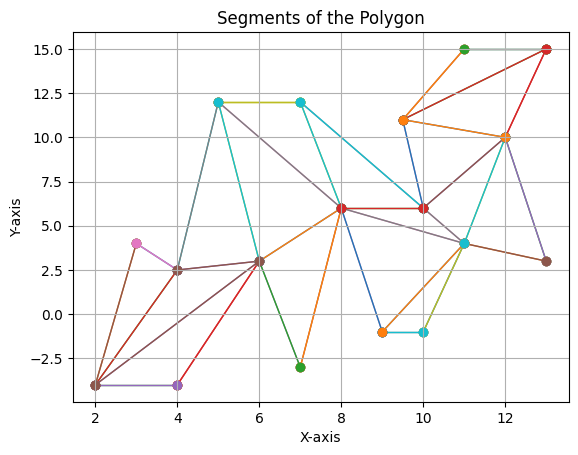

In [82]:
plt.figure()
for segment in lineas:
    x_values = [punto.x for punto in segment]
    y_values = [punto.y for punto in segment]
    plt.plot(x_values, y_values, marker='o', linestyle='-', linewidth=1, zorder=1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Segments of the Polygon')
plt.grid(True)

##Punto5

In [83]:
def tresColoracion(listaTresColorada):

  for i in listaTresColorada:
    print(i)
    if i.color == None:
      vecinosI = getVecinos(listaTresColorada, i)
      green = True
      red = True
      blue = True
      for j in vecinosI:

        vecino = listaTresColorada[encontrarSemiaristaa(listaTresColorada, j)]

        for k in listaTresColorada:
          if k.coordenadas.x == vecino.coordenadas.x and k.coordenadas.y == vecino.coordenadas.y:
            if vecino.color == "red":
              red = False
            if vecino.color == "blue":
              blue = False
            if vecino.color == "green":
              green = False
    else:
      continue

    if red:
      i.color = "red"
      for j in listaTresColorada:
        if j.coordenadas.x == i.coordenadas.x and j.coordenadas.y == i.coordenadas.y:
          j.color = "red"
      continue
    if blue:
      i.color = "blue"
      for j in listaTresColorada:
        if j.coordenadas.x == i.coordenadas.x and j.coordenadas.y == i.coordenadas.y:
          j.color = "blue"
      continue
    if green:
      i.color = "green"
      for j in listaTresColorada:
        if j.coordenadas.x == i.coordenadas.x and j.coordenadas.y == i.coordenadas.y:
          j.color = "green"
      continue


  return listaTresColorada





In [84]:

tmp = test20[0]
test20[0]=test20[16]
test20[16] = tmp

tmp3 =test20[1]
test20[1]=test20[14]
test20[14]=tmp3

tmp2 = test20[2]
test20[2]=test20[14]
test20[14]=tmp2
adda = tresColoracion(test20)


tmp3=test20[3]
test20[3]=test20[7]
test20[7]=tmp3

('e161', 'n16', (8.0,6.0), 'e162', 'e252', 'e281', 'fExterior13', None, None, 'i', None)
('e141', 'n14', (6.0,3.0), 'e142', 'e151', 'e321', 'fExterior15', None, None, 'i', None)
('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e282', 'fExterior13', None, None, 'i', None)
('e31', 'n3', (12.0,10.0), 'e32', 'e261', 'e301', 'fExterior12', None, None, 'd', None)
('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e262', 'fExterior6', None, None, 'd', None)
('e51', 'n5', (11.0,15.0), 'e52', 'e262', 'e41', 'fExterior6', None, None, None, None)
('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e302', 'fExterior11', None, None, 'i', None)
('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e311', 'fExterior14', None, None, 'd', None)
('e81', 'n8', (7.0,12.0), 'e82', 'e231', 'e192', 'fExterior13', None, None, 'd', None)
('e91', 'n9', (5.0,12.0), 'e92', 'e221', 'e241', 'fExterior10', None, None, None, None)
('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e212', 'fExterior6', None, None, 'd', None)
('e111', 'n11', (3.0,4.0), 'e112', 'e2

In [85]:
lineas = []
for i in test20:
  siguiente = i.siguiente
  lineas.append((test20[encontrarSemiaristaa(test20, siguiente)].coordenadas, i.coordenadas))

In [86]:
test20

[('e161', 'n16', (8.0,6.0), 'e162', 'e252', 'e281', 'fExterior13', None, None, 'i', 'red'),
 ('e141', 'n14', (6.0,3.0), 'e142', 'e151', 'e321', 'fExterior15', None, None, 'i', 'blue'),
 ('e11', 'n1', (11.0,4.0), 'e12', 'e21', 'e282', 'fExterior13', None, None, 'i', 'blue'),
 ('e71', 'n7', (10.0,6.0), 'e72', 'e191', 'e311', 'fExterior14', None, None, 'd', None),
 ('e41', 'n4', (13.0,15.0), 'e42', 'e51', 'e262', 'fExterior6', None, None, 'd', 'blue'),
 ('e51', 'n5', (11.0,15.0), 'e52', 'e262', 'e41', 'fExterior6', None, None, None, 'red'),
 ('e61', 'n6', (9.5,11.0), 'e62', 'e182', 'e302', 'fExterior11', None, None, 'i', 'green'),
 ('e31', 'n3', (12.0,10.0), 'e32', 'e261', 'e301', 'fExterior12', None, None, 'd', 'red'),
 ('e81', 'n8', (7.0,12.0), 'e82', 'e231', 'e192', 'fExterior13', None, None, 'd', 'blue'),
 ('e91', 'n9', (5.0,12.0), 'e92', 'e221', 'e241', 'fExterior10', None, None, None, 'green'),
 ('e101', 'n10', (4.0,2.5), 'e102', 'e111', 'e212', 'fExterior6', None, None, 'd', 'red')

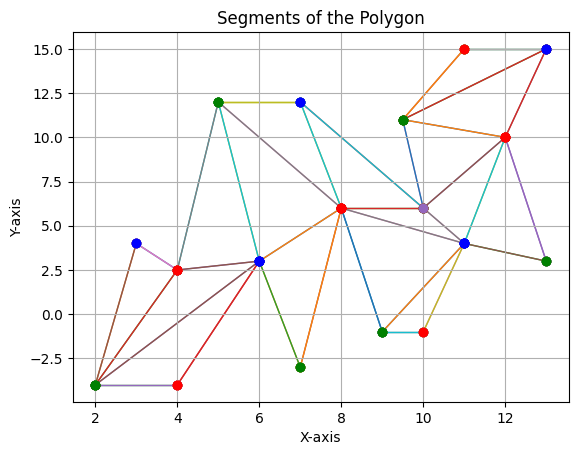

In [87]:

plt.figure()
for segment in lineas:
    x_values = [punto.x for punto in segment]
    y_values = [punto.y for punto in segment]
    plt.plot(x_values, y_values, marker='o', linestyle='-', linewidth=1, zorder=1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Segments of the Polygon')
plt.grid(True)


for i in adda:
    plt.scatter(i.coordenadas.x, i.coordenadas.y, color=i.color, zorder=2)

plt.show()

Se puede ver que el color que menos se repite es el azul, luego con 5 camaras se puede vigilar la galeria